In [1]:
import matplotlib.pyplot as plt # for plotting and creating figures
import numpy as np # for easy and fast number calculation
from math import tau

import draw_circle_fourier
from draw_circle_fourier import ImageReader
from draw_circle_fourier import Fourier
from draw_circle_fourier import DrawAnimation

[0.00000000e+00 2.46883509e-03 4.93767018e-03 ... 6.27824764e+00
 6.28071647e+00 6.28318531e+00] [-55.91927801 -56.70261134 -56.91927801 ... -53.91927801 -54.91927801
 -55.91927801] [336.72646761 336.08701183 335.93224992 ... 336.50459425 336.79092244
 336.72646761]


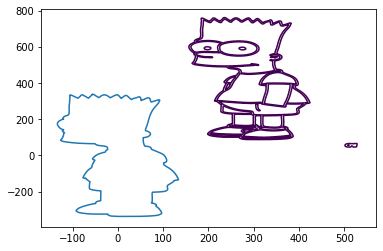

In [2]:
# Part Kenjy

image = ImageReader("https://api.coloriages-a-imprimer.com/coloring/assets/gas4xtxv4m8gswgw?key=")
time_table, x_table, y_table = image.get_tour()
print(time_table, x_table, y_table)

In [3]:
#Part COCO

order = 10

cf = Fourier(time_table, x_table, y_table,order)
fouriercoeff = cf.coef_list(time_table, x_table, y_table, order)

print(fouriercoeff)

[[ 1.13447342e+00 -9.60267672e-01]
 [-2.00010900e+00 -4.39055479e-01]
 [ 6.20927694e+00 -1.24035094e+00]
 [-5.23306119e+00 -3.68131221e+00]
 [-8.80735223e-01  3.31126180e+00]
 [-7.04475688e+00  3.11861106e+00]
 [-5.06857241e+00  8.37506922e-02]
 [ 4.92774197e+00 -9.31429998e+00]
 [-2.44322731e+00 -9.62608367e+00]
 [ 8.69492399e+00  1.07890339e+02]
 [-1.40397733e+00  2.57035133e+01]
 [-4.79484421e+01  2.05207038e+02]
 [-9.47694284e+00 -9.84402474e+00]
 [-5.99647256e+00  2.64954532e+01]
 [ 5.65341890e+00 -4.03454910e+00]
 [ 3.69435027e+00 -1.69057619e+00]
 [ 4.92504179e+00 -6.70546313e+00]
 [-5.13772825e+00  5.35233261e+00]
 [ 3.91010677e+00  2.48007568e-01]
 [-4.23107622e-01  3.60678913e-01]
 [ 9.31065051e-01 -2.03745047e+00]]


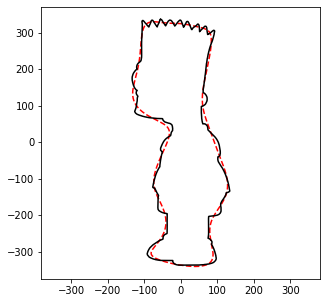

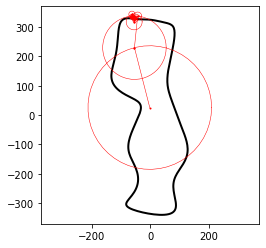

In [4]:
#Part Paul+Pierre

space = np.linspace(0,tau,300)
x_DFT = [cf.DFT(t, fouriercoeff, order)[0] for t in space]
y_DFT = [cf.DFT(t, fouriercoeff, order)[1] for t in space]

fig, ax = plt.subplots(figsize=(5, 5))
ax.plot(x_DFT, y_DFT, 'r--')
ax.plot(x_table, y_table, 'k-')
ax.set_aspect('equal', 'datalim')
xmin, xmax = plt.xlim()
ymin, ymax = plt.ylim()

b = DrawAnimation(x_DFT, y_DFT, fouriercoeff, order, space, [xmin, xmax, ymin, ymax])
anim = b.visualize(x_DFT, y_DFT, fouriercoeff, order, space, [xmin, xmax, ymin, ymax])

#Change based on what writer you have
#HTML(anim.to_html5_video())
#anim.save('pi.mp4',writer='ffmpeg')
anim.save('Bart.gif',writer='pillow')

In [5]:
from IPython.display import HTML
HTML(anim.to_jshtml())